In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
import glob

%matplotlib inline
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.76 ms


/Users/yogiman/Workspace/Cache/xuyuji9000/jupyter-playground/venv/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


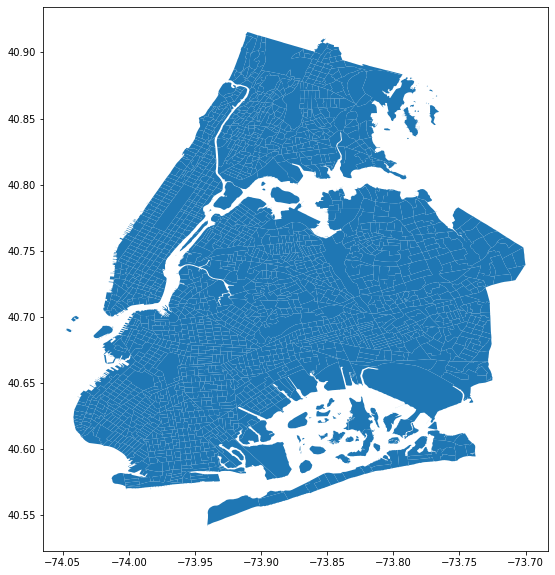

time: 2.06 s


In [2]:
# prepare map data
street_map = gpd.read_file("./shapfiles/nyct2010_15b")
street_map = street_map.to_crs(crs={'proj': 'latlong', 'datum': 'WGS84'})
map_ex_staten_island = street_map[street_map['BoroName'] != 'Staten Island']
map_ex_staten_island.head()
map_ex_staten_island.sindex


# display
fig,ax = plt.subplots(figsize = (10, 10))
map_ex_staten_island.plot(ax=ax)

In [3]:
# prepare ride point data
path='./uber-trip-data'
all_files = glob.glob(path + "/*14.csv")

li = []
for filename in all_files:
    print(filename)
    temp = pd.read_csv(filename, index_col=None, header=0)
    print(temp.shape)
    li.append(temp)

./uber-trip-data/uber-raw-data-apr14.csv
(564516, 4)
./uber-trip-data/uber-raw-data-aug14.csv
(829275, 4)
./uber-trip-data/uber-raw-data-sep14.csv
(1028136, 4)
./uber-trip-data/uber-raw-data-jul14.csv
(796121, 4)
./uber-trip-data/uber-raw-data-jun14.csv
(663844, 4)
./uber-trip-data/uber-raw-data-may14.csv
(652435, 4)
time: 1.86 s


In [4]:
df=pd.concat(li, axis=0, ignore_index=True)
uber_ride=gpd.GeoDataFrame(df,  
                  crs={'proj': 'latlong', 'datum': 'WGS84'}, 
                  geometry=gpd.points_from_xy(df.Lon, df.Lat))
uber_ride.shape

(4534327, 5)

time: 39.1 s


In [5]:
# get intersection of points and new york map
intersection = gpd.sjoin(uber_ride, 
          map_ex_staten_island, 
          how="inner", 
          op='intersects')

time: 6min 21s


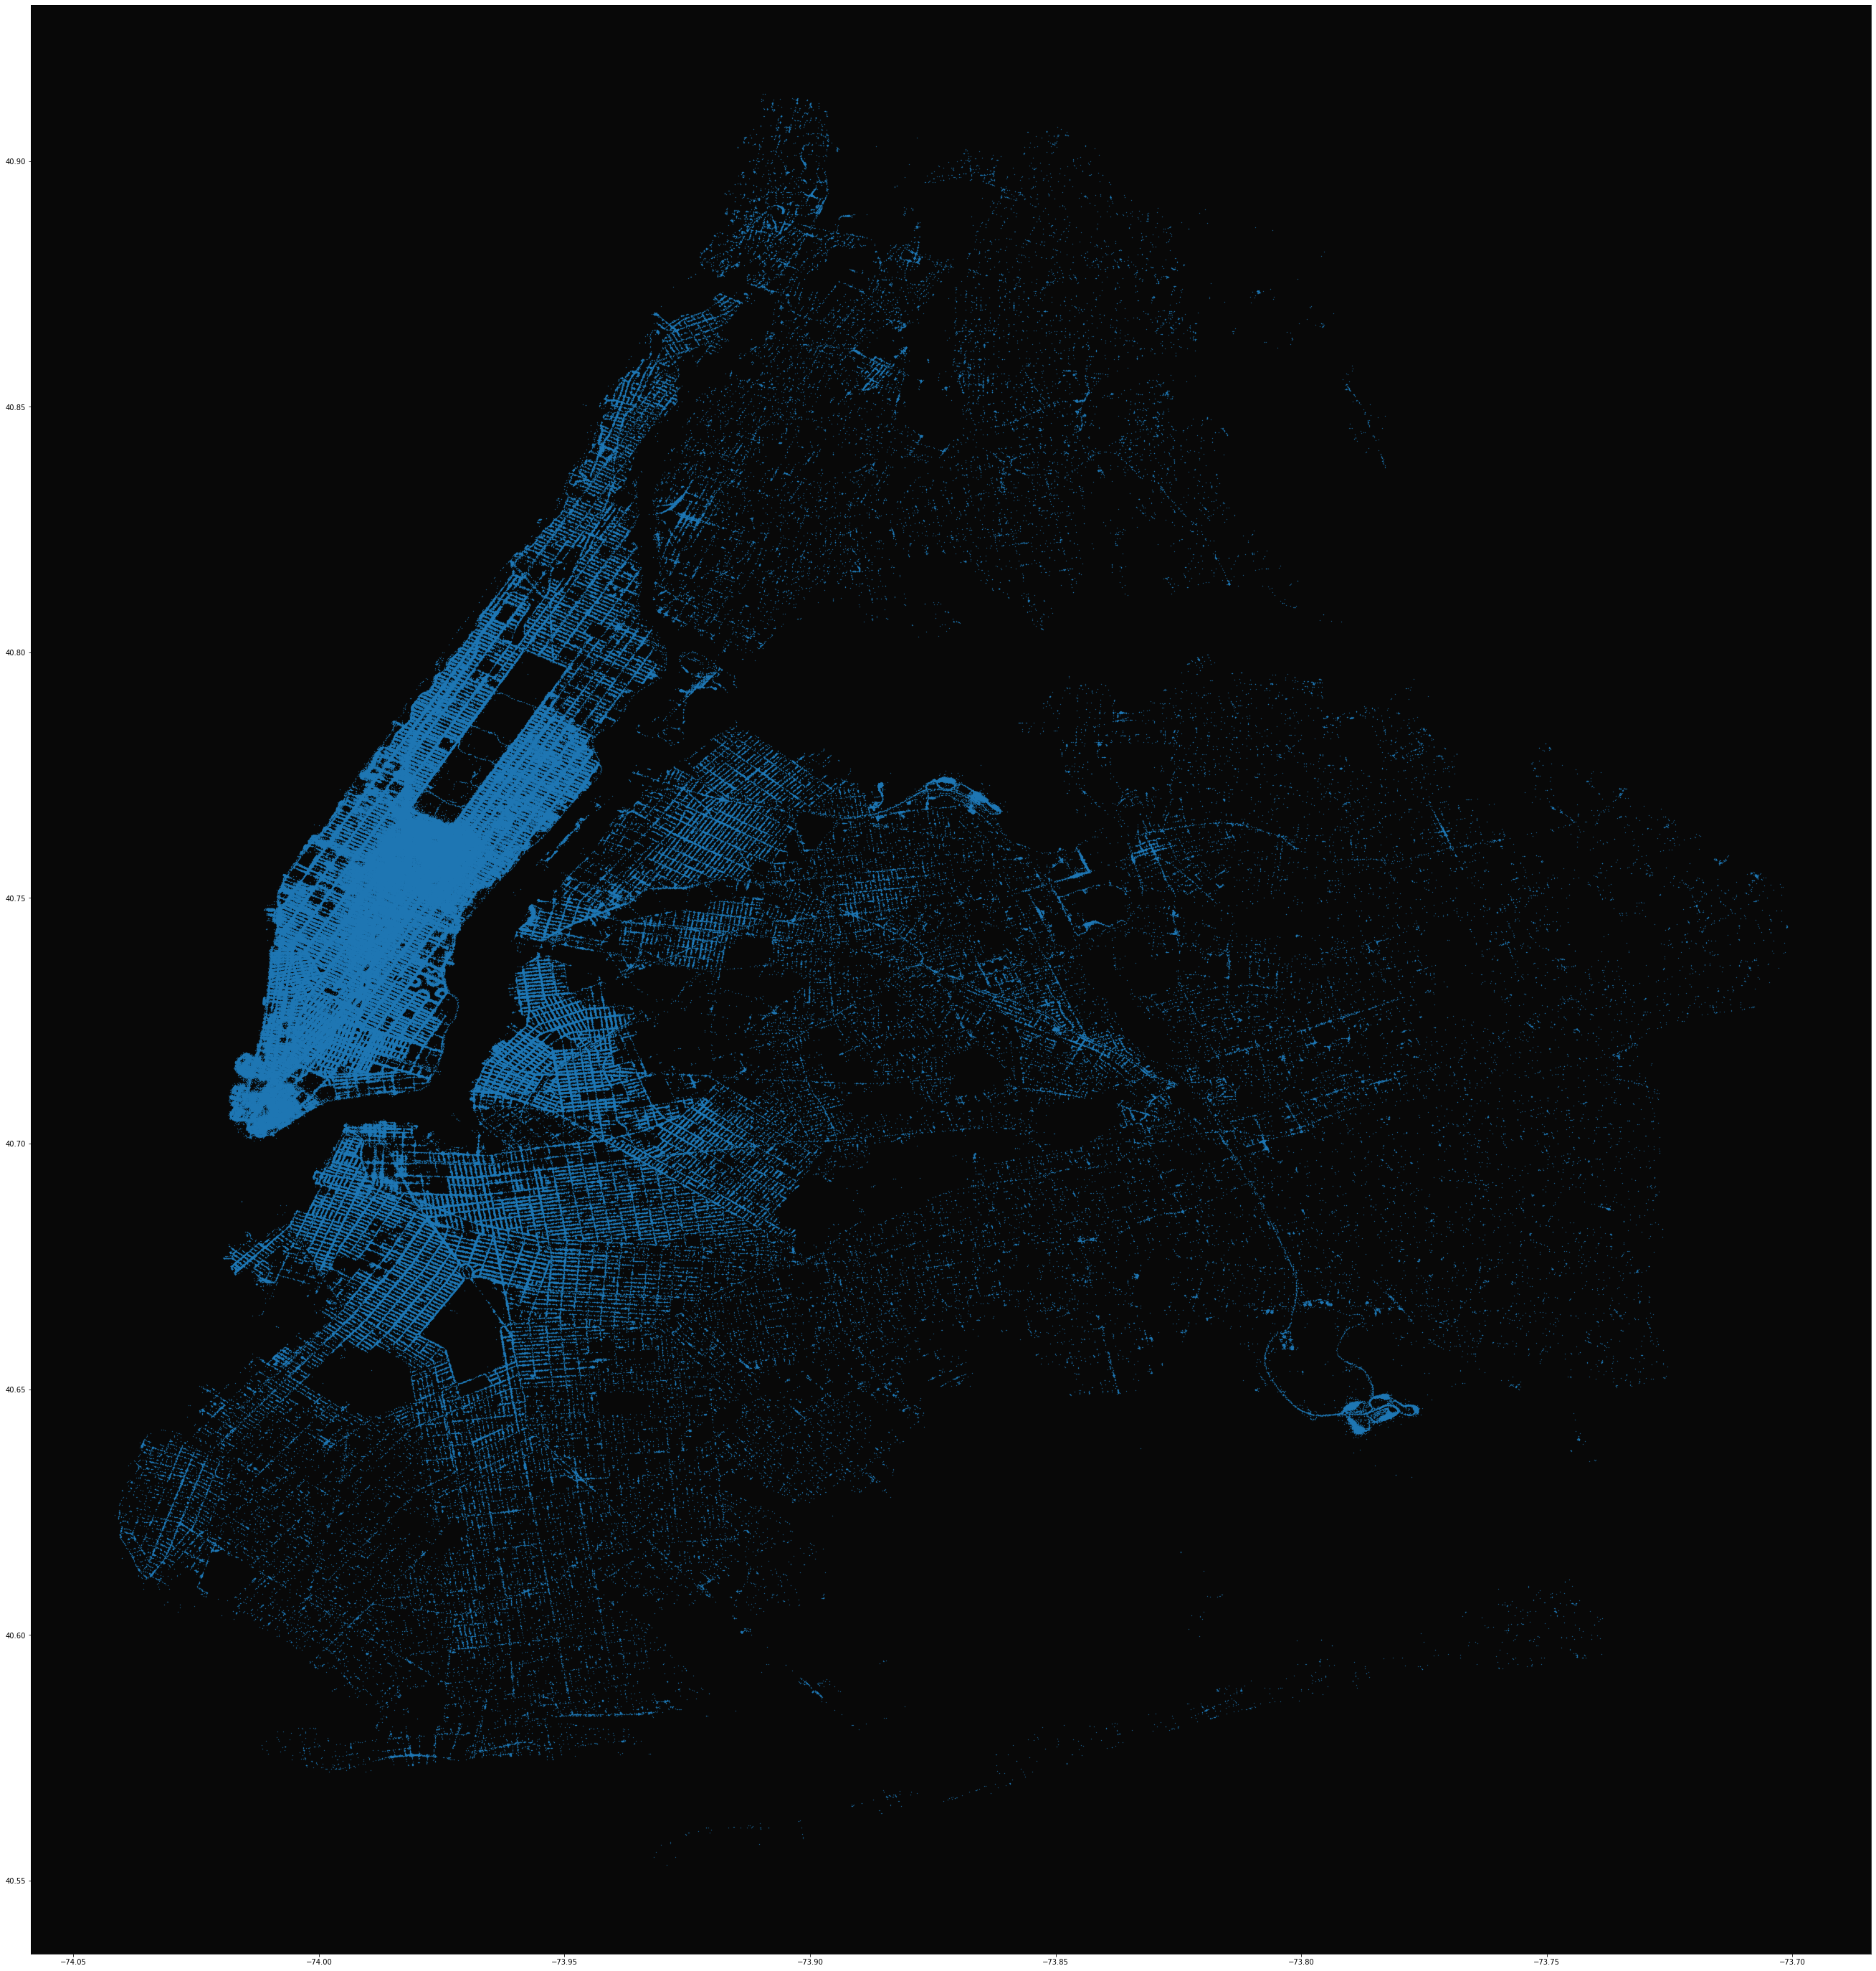

time: 3min 13s


In [6]:
# draw out all the points
fig,ax = plt.subplots(figsize = (50, 50))
ax.set_facecolor("#080808")
intersection.plot(ax=ax,marker='o', markersize=0.1)
plt.savefig('test.png')